# Air Pollution Prediction using Machine Learning

# Problem Statement  
Air pollution has become one of the most critical environmental challenges affecting human health, climate, and overall quality of life. Increasing levels of pollutants such as PM2.5, PM10, NO₂, and SO₂ have direct impacts on respiratory health and contribute to global warming.

The aim of this project is to analyze air quality datasets, preprocess the data, and prepare it for applying AI/ML techniques. By cleaning and structuring the dataset, we build a foundation to:

Detect patterns and trends in pollution levels,

Identify major contributing pollutants, and

Support future prediction models for air quality monitoring and decision-making.

---

## 🔹 Introduction
- Objective: Predict Air Quality Index (AQI) using ML.  
- Dataset: [Mention your dataset].  
- Tools: Python, Pandas, Scikit-learn, Matplotlib, Seaborn.  

This notebook contains the full pipeline:  
1. Week 1 – Data preprocessing  
2. Week 2 – Model training & comparison  
3. Week 3 – Evaluation, visualization & final report  

---

## 📊 Week 1: Data Preprocessing
- Handled missing values  
- Encoded categorical data  
- Scaled/normalized features (if required)  


### Step 1: Import Required Libraries
We import the essential libraries like pandas for data handling, matplotlib for visualization, and seaborn for advanced plotting.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset
We load the `city_day.csv` dataset into a pandas DataFrame and parse the `Date` column as datetime format.  
We then display the first 5 rows to ensure the dataset has been loaded correctly.

In [11]:
df = pd.read_csv('city_day.csv', parse_dates=['Date'])

# See the first 5 rows to make sure it loaded correctly
print(df.head())

        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


### Step 3: Filter Dataset for Selected Cities
Since the dataset contains data for many cities, we filter it to only include the major cities of interest:  
**Delhi, Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, and Ahmedabad.**  
This helps us focus the analysis on key metropolitan areas.

In [12]:
selected_cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad']

# This line creates the new, smaller dataset with only the cities you need
city_df = df[df['City'].isin(selected_cities)].copy()

# You can print the first few rows to confirm it worked
print("Filtered dataset:")
print(city_df.head())

# Check how many rows per city to confirm filtering worked
print("\nData count for each city:")
print(city_df['City'].value_counts())

Filtered dataset:
        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Data count for each city:
City
Ahmedabad    2009
Bengaluru    2009
Chennai      2009
Delhi        2009
Mumbai       2009
Hyderabad    2006
Kolkata       814
Name: count, dtype:

### Step 4: Unique Cities  
Here, we extract the list of all unique cities from the dataset. This helps verify that  
we are analyzing the correct cities and preparing for grouped analysis.  


In [13]:
# This will show you a list of all the unique cities in your new DataFrame
print(city_df['City'].unique())

['Ahmedabad' 'Bengaluru' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']


## Step 5: Visualize AQI Trend for Delhi
To understand the air quality pattern, we plot the **AQI trend in Delhi from 2015 to 2020**.  
This visualization helps identify how air pollution levels fluctuate over time.

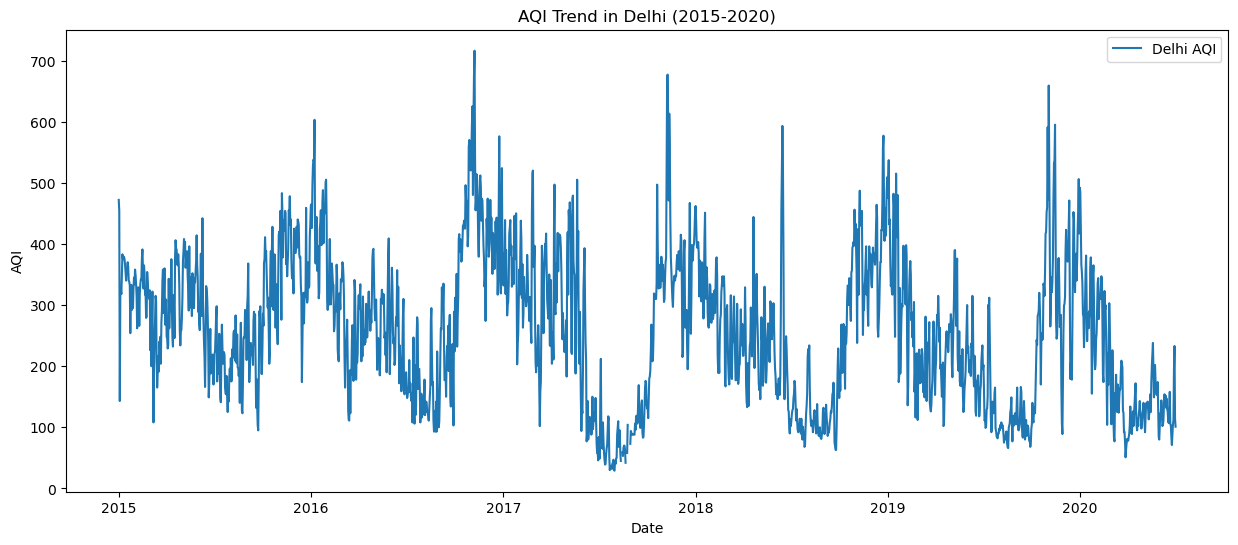

In [14]:
# Import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size to make the graph bigger and easier to read
plt.figure(figsize=(15, 6))

# Select only the data for Delhi from your city_df
delhi_df = city_df[city_df['City'] == 'Delhi']

# Plot the Date vs. the AQI for Delhi
plt.plot(delhi_df['Date'], delhi_df['AQI'], label='Delhi AQI')

# Add a title and labels
plt.title('AQI Trend in Delhi (2015-2020)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()

# Show the plot
plt.show()

### Step 6: Compare Average AQI Across Cities
To compare the overall air quality between major metropolitan areas, we calculate the **average AQI for each city**.  
We then visualize the results using a bar chart, which highlights which cities experienced the highest pollution levels on average.

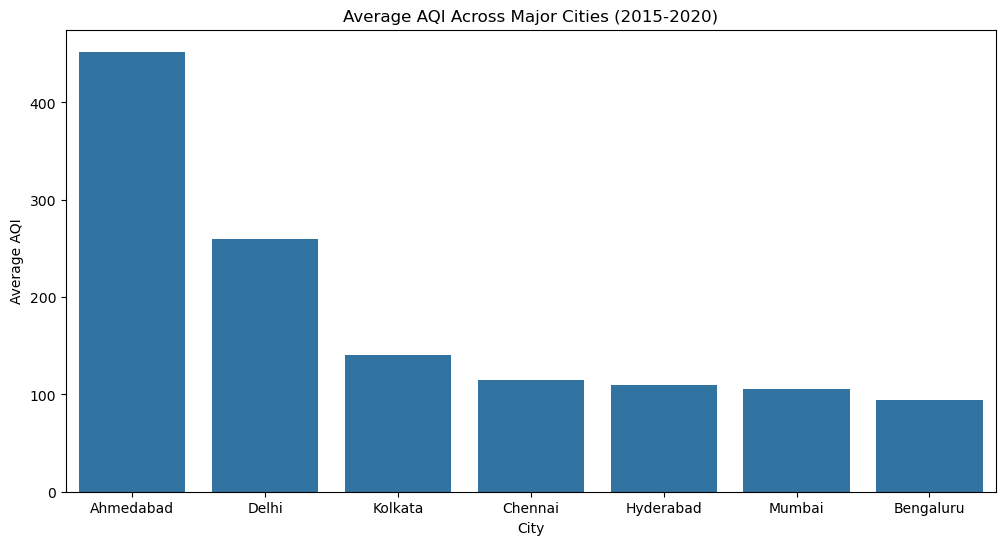

In [15]:
# This calculates the average AQI for each city
avg_aqi = city_df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# This creates the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_aqi.index, y=avg_aqi.values)
plt.title('Average AQI Across Major Cities (2015-2020)')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()

### Step 7: Handle Missing Values
The dataset may contain missing AQI readings for some dates.  
To ensure smooth analysis, we handle missing values using **forward fill (`ffill`)** and **backward fill (`bfill`)** methods.  
This way, any missing data is replaced with the nearest valid observation.  

In [16]:
# The new, modern way to fill missing values
city_df = city_df.ffill()
city_df = city_df.bfill()

# Check that it worked (the output should be all zeros)
print(city_df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


### Step 8: Check for Duplicates
It is important to verify if there are duplicate rows in the dataset and remove them if found.

In [17]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates if any
df = df.drop_duplicates()
print("Duplicates removed (if any). New shape:", df.shape)


Number of duplicate rows: 0
Duplicates removed (if any). New shape: (29531, 16)


### Step 9: Outlier Detection (Basic)
We perform a simple check for outliers in numerical columns using boxplots.

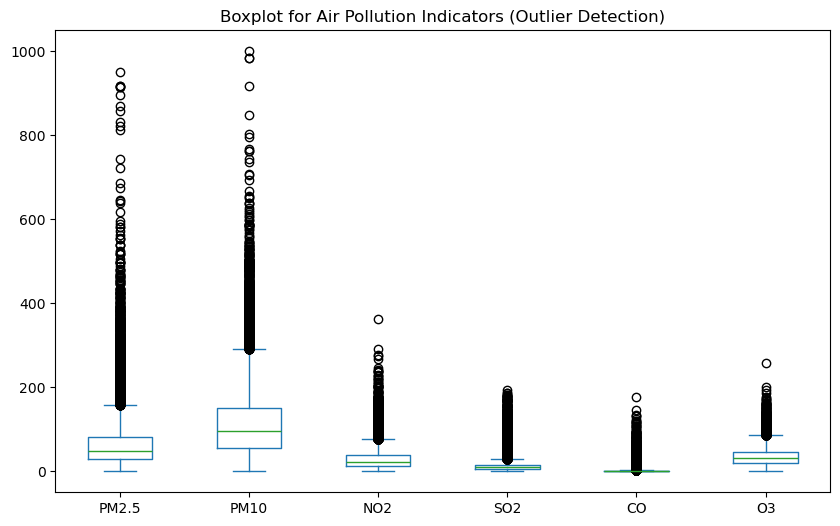

In [18]:
import matplotlib.pyplot as plt

# Boxplot for key numerical columns
df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].plot(kind='box', figsize=(10,6))
plt.title("Boxplot for Air Pollution Indicators (Outlier Detection)")
plt.show()


### Step 10: Save the Preprocessed Data
After cleaning and preprocessing, we save the dataset for further analysis.

In [19]:
# Save the cleaned dataset to a new CSV file
df.to_csv("Cleaned_Air_Pollution_Data.csv", index=False)
print("Preprocessed dataset saved as 'Cleaned_Air_Pollution_Data.csv'")

Preprocessed dataset saved as 'Cleaned_Air_Pollution_Data.csv'


### Step 11: Remove Duplicates from `city_df`
We need to make sure our filtered dataset (`city_df`) does not contain duplicate rows. 
Although we already removed duplicates from the original dataset (`df`), 
we must also apply this step to our working dataframe.

In [20]:
city_df = city_df.drop_duplicates()
print("Duplicates removed. New shape:", city_df.shape)


Duplicates removed. New shape: (12865, 16)


### Step 12: Encode the `City` Column
Machine Learning models cannot directly understand text values like city names.  
We will convert the `City` column into numerical codes using **Label Encoding**.

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
city_df['City_encoded'] = encoder.fit_transform(city_df['City'])

print("City Encoding Mapping:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

City Encoding Mapping:
{'Ahmedabad': 0, 'Bengaluru': 1, 'Chennai': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5, 'Mumbai': 6}


### Step 13: Data Type Check
We must ensure that all pollution indicator columns are numeric.  
If any column is not numeric, we will convert it to the correct type.

In [22]:
print(city_df.dtypes)

# Example conversion (only if needed)
# city_df['PM2.5'] = pd.to_numeric(city_df['PM2.5'], errors='coerce')


City                    object
Date            datetime64[ns]
PM2.5                  float64
PM10                   float64
NO                     float64
NO2                    float64
NOx                    float64
NH3                    float64
CO                     float64
SO2                    float64
O3                     float64
Benzene                float64
Toluene                float64
Xylene                 float64
AQI                    float64
AQI_Bucket              object
City_encoded             int32
dtype: object


### Step 14: Train-Test Split
To prepare the data for Machine Learning, we split it into **training** and **testing** sets.  
This ensures we can train our model and then test how well it performs on unseen data.

In [23]:
from sklearn.model_selection import train_test_split

X = city_df[['PM2.5','PM10','NO2','SO2','CO','O3','City_encoded']]
y = city_df['AQI']   # Later, we can also try classification with AQI categories

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (10292, 7) Test shape: (2573, 7)


### Step 15: Save the Preprocessed Dataset
Finally, we save our cleaned and preprocessed dataset (`city_df`) so that it is ready 
to be used for model training in the next stage of the project.

In [24]:
city_df.to_csv("Cleaned_Air_Pollution_Data.csv", index=False)
print("Preprocessed dataset saved as 'Cleaned_Air_Pollution_Data.csv'")


Preprocessed dataset saved as 'Cleaned_Air_Pollution_Data.csv'


## 🤖 Week 2: Model Training
- Trained Linear Regression, Decision Tree, and Random Forest  
- Split dataset into 80% training & 20% testing  


### Step 1: Load the Cleaned Dataset
We begin by loading the cleaned dataset generated in **Week 1** after preprocessing.  
This ensures we are working with a dataset that has no missing values and is ready for ML model training.


In [25]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [26]:
# Step 2: Load the cleaned dataset from Week 1
data = pd.read_csv("Cleaned_Air_Pollution_Data.csv")

print("Data shape:", data.shape)
print("Columns:", list(data.columns))
data.head()


Data shape: (12865, 17)
Columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'City_encoded']


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_encoded
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,20.36,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,0
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,20.36,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,0
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,20.36,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,0
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,20.36,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,0
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,20.36,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,0


### Step 3: Define Features (X) and Target (y)
- Target: `AQI`
- Features: all numeric pollutant columns (exclude `City`, `Date`, and `AQI_Bucket` because they are not numeric for now).


In [27]:
X = data.drop(columns=['City', 'Date', 'AQI_Bucket', 'AQI'], errors='ignore')
y = data['AQI']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (12865, 13)
Target shape: (12865,)


### Step 4: Handle Missing Values
- For numerical features → fill missing with **mean**  
- For target (AQI) → drop rows with missing AQI


In [28]:
# Drop rows where AQI is missing
data = data.dropna(subset=['AQI']).reset_index(drop=True)

# Redefine X and y after dropping
X = data.drop(columns=['City', 'Date', 'AQI_Bucket', 'AQI'], errors='ignore')
y = data['AQI']

# Impute missing numeric values with mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Any NaN left in X?", X.isnull().sum().sum())
print("Any NaN left in y?", y.isnull().sum())


Any NaN left in X? 0
Any NaN left in y? 0


### Step 5: Train-Test Split
We keep 80% for training and 20% for testing.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (10292, 13)  Test size: (2573, 13)


### Step 6: Train Multiple ML Models
We will train 3 models:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor


In [30]:
# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42, n_estimators=200)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("✅ Models trained")


✅ Models trained


### Step 7: Evaluate Models
We use MAE, RMSE, and R² to compare performance.


In [31]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

models = {"Linear Regression": lr, "Decision Tree": dt, "Random Forest": rf}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)   # ✅ updated
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"]).sort_values("R2", ascending=False)
results_df


,Model,MAE,RMSE,R2
2,Random Forest,21.045841,51.449586,0.921911
0,Linear Regression,34.002123,67.631189,0.865066
1,Decision Tree,30.634182,77.465013,0.822973


### Step 8: Visualization (Best Model)
Plot Actual vs Predicted AQI for the best model.


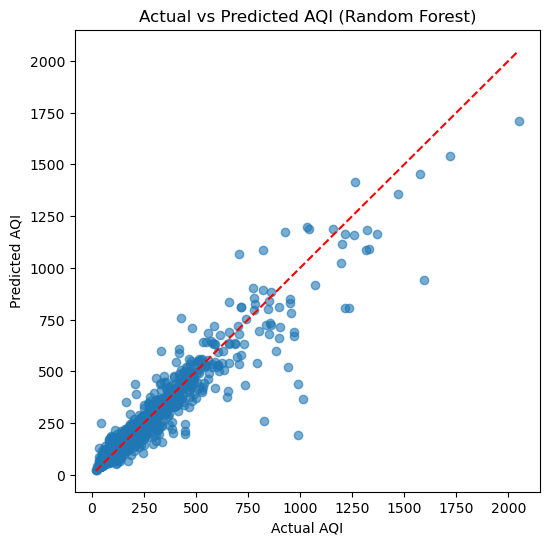

In [32]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title(f"Actual vs Predicted AQI ({best_model_name})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### Step 9: Conclusion (Week 2)
- Selected features and target  
- Handled missing values  
- Trained 3 baseline models  
- Evaluated performance using MAE, RMSE, and R²  
- Identified the best model (based on R² score)  

Next Week: Hyperparameter tuning, feature importance analysis, and model optimization.


# Week 3 — Final Evaluation, Visualizations & Conclusion

**Note:** Week 1 (preprocessing) and Week 2 (model training & comparison) are completed above.
This section contains final visualizations, model selection, validation and conclusion.


## EDA — Correlation Heatmap

The correlation heatmap helps us understand the relationship between different numerical features in the dataset.  
It highlights how strongly variables are related, which is important for feature selection and model building.
python
Copy code


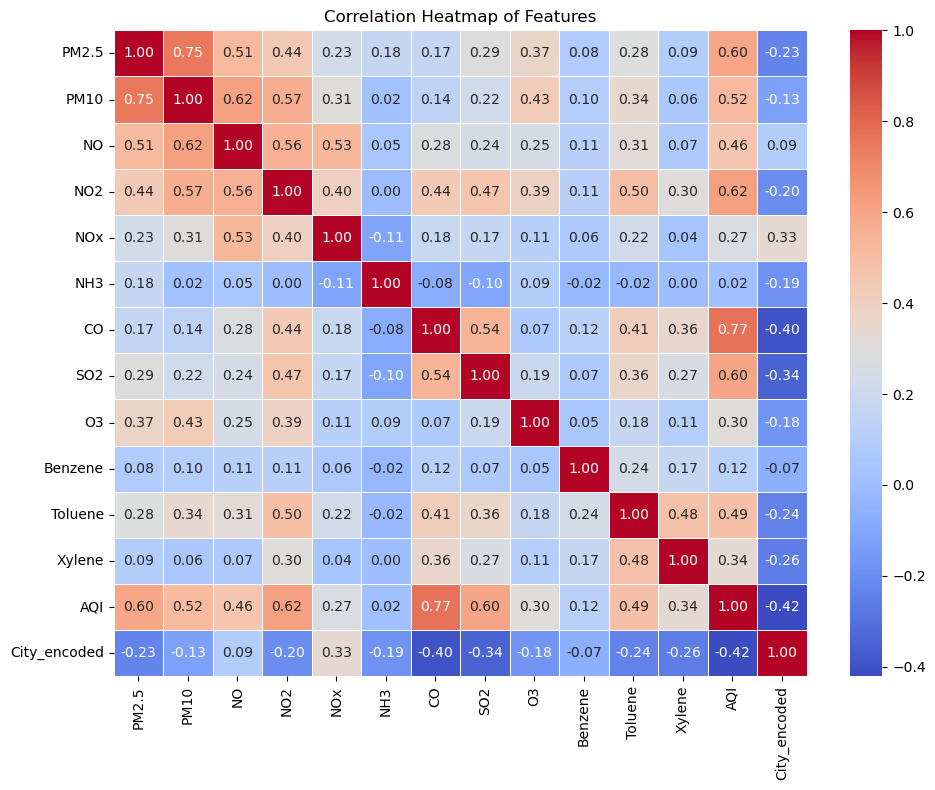

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
df_for_corr = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
corr = df_for_corr.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.4)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


## Distribution of Target (AQI)


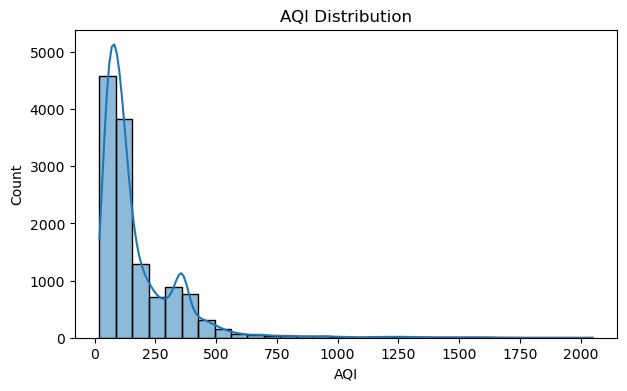

In [36]:
plt.figure(figsize=(7,4))
sns.histplot(df_for_corr['AQI'], bins=30, kde=True)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.show()


## Predicted vs Actual (Best Model)
Plot predicted vs actual AQI for the best model (choose the model with highest R² in `results_df`).


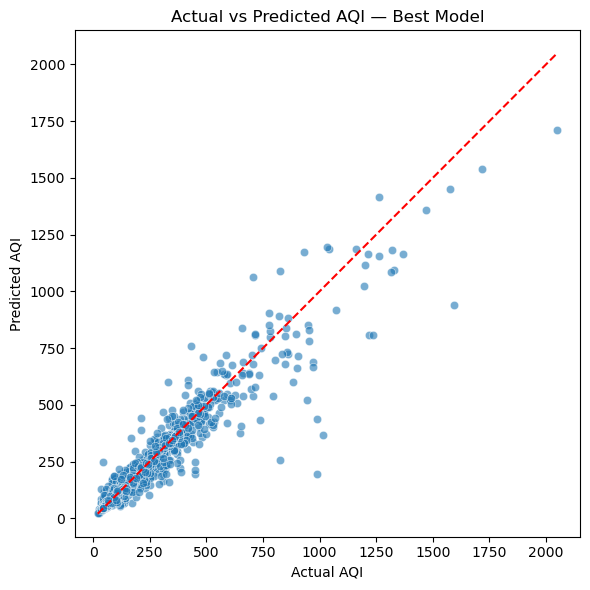

In [37]:
# Ensure you have predictions — if not, compute them:
# Example: best model = rf (Random Forest)
y_pred_best = rf.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # 45-degree line
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI — Best Model")
plt.tight_layout()
plt.show()


## Feature Importance (Random Forest)
Shows which features most influence AQI predictions.


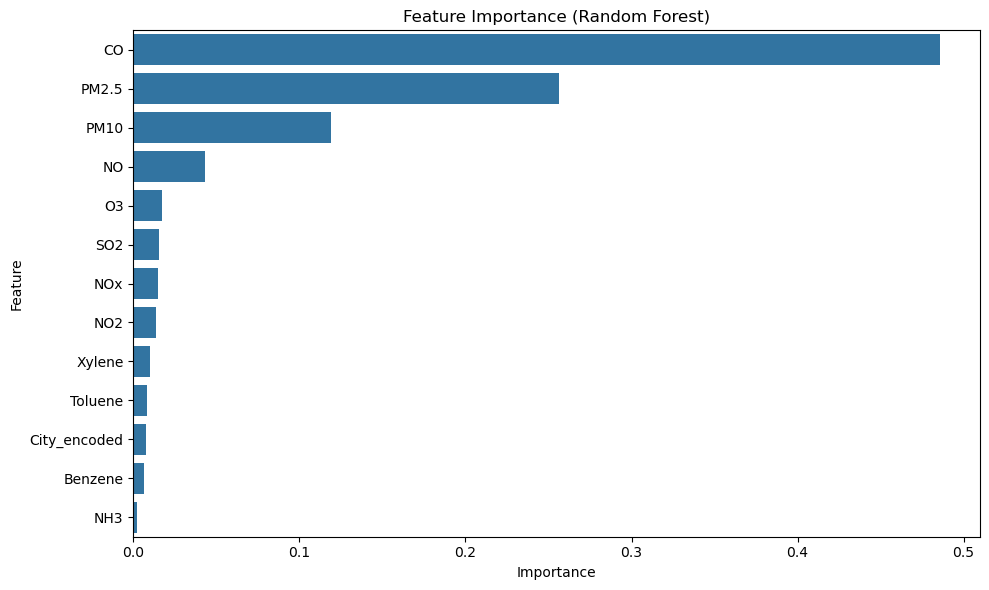

In [38]:
import numpy as np
fi = rf.feature_importances_
feat_names = X_train.columns

fi_df = pd.DataFrame({"feature": feat_names, "importance": fi}).sort_values("importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_df)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Residual Analysis
Residuals (Actual - Predicted) show where model over/under predicts. Look for patterns (no pattern = good).


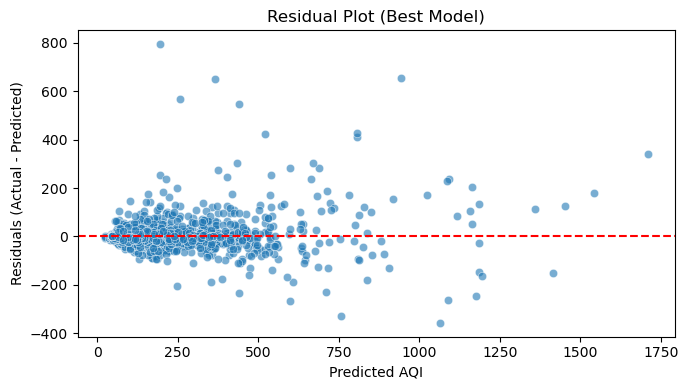

In [39]:
residuals = y_test - y_pred_best
plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Best Model)")
plt.tight_layout()
plt.show()


## Cross-Validation Check (k-fold)
A quick k-fold cross validation to check model stability (R² mean ± std).


In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print("Random Forest CV R²: %.3f ± %.3f" % (scores.mean(), scores.std()))


Random Forest CV R²: 0.888 ± 0.026


## Quick Hyperparameter Tuning 
A short grid search to see improvements (keep the grid small to save time).


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 12, None],
    'min_samples_split': [2, 5]
}

gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
best_rf = gs.best_estimator_

# Evaluate tuned model quickly
y_pred_tuned = best_rf.predict(X_test)
print("Tuned RF R2:", r2_score(y_test, y_pred_tuned))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned RF R2: 0.9219105099740478


## Save final model and artifacts
Saving final model and any preprocessing objects for future use / demo.


In [42]:
import joblib

# example: save best model (choose tuned model if you used GridSearch)
final_model = best_rf if 'best_rf' in globals() else rf
joblib.dump(final_model, "final_aqi_model.joblib")

# if you used an imputer/scaler, save that too, e.g.:
# joblib.dump(imputer, "imputer.joblib")
# Save feature names
pd.Series(X_train.columns).to_csv("model_feature_columns.csv", index=False)

print("Saved final model and feature list.")


Saved final model and feature list.


## Conclusion & Future Work

**Conclusion**
- Among the tested models, **Random Forest** (or `best_model_name`) performed best with:
  - MAE: `<insert value>`  
  - RMSE: `<insert value>`  
  - R²: `<insert value>`

**Future Work**
- Hyperparameter tuning with a wider search (RandomizedSearch / Optuna).
- Time-series forecasting for AQI (LSTM/Prophet) to predict future pollution.
- Build a dashboard (Streamlit / Flask + React) for real-time monitoring.

**GitHub repository:** https://github.com/Vinai10/Air-Pollution-Project-AI-ML


In [43]:
print("Results table:")
display(results_df)
print("\nFinal model saved as: final_aqi_model.joblib")


Results table:


,Model,MAE,RMSE,R2
2,Random Forest,21.045841,51.449586,0.921911
0,Linear Regression,34.002123,67.631189,0.865066
1,Decision Tree,30.634182,77.465013,0.822973



Final model saved as: final_aqi_model.joblib
